In [1]:
import healpy as hp
import os
import numpy as np
import pymaster as nmt

In [2]:
mpath = "/project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks"

In [3]:
gal = hp.read_map('planck.fits',field=4)

In [4]:
def change_coord(m, coord):
    """ Change coordinates of a HEALPIX map

    Parameters
    ----------
    m : map or array of maps
      map(s) to be rotated
    coord : sequence of two character
      First character is the coordinate system of m, second character
      is the coordinate system of the output map. As in HEALPIX, allowed
      coordinate systems are 'G' (galactic), 'E' (ecliptic) or 'C' (equatorial)

    Example
    -------
    The following rotate m from galactic to equatorial coordinates.
    Notice that m can contain both temperature and polarization.
    >>>> change_coord(m, ['G', 'C'])
    """
    # Basic HEALPix parameters
    npix = m.shape[-1]
    nside = hp.npix2nside(npix)
    ang = hp.pix2ang(nside, np.arange(npix))

    # Select the coordinate transformation
    rot = hp.Rotator(coord=reversed(coord))

    # Convert the coordinates
    new_ang = rot(*ang)
    new_pix = hp.ang2pix(nside, *new_ang)

    return m[..., new_pix]

In [5]:
nside = 2048
mask_percent_n = 25
mask_percent_s = 1
npix = hp.nside2npix(nside)
mask = np.zeros(npix)
from_i = int(npix*mask_percent_n/100)
to_i = npix - int(npix*mask_percent_s/100)


mask[from_i:to_i] = 1

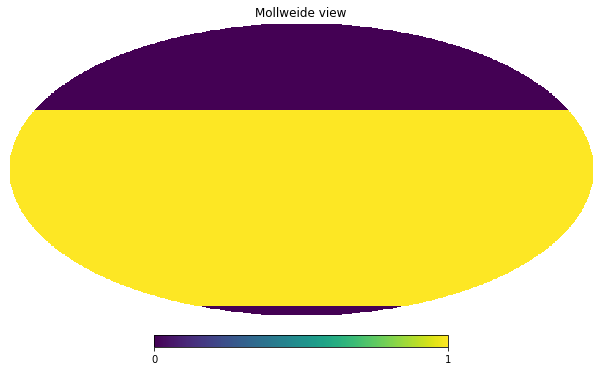

In [6]:
 hp.mollview(mask)

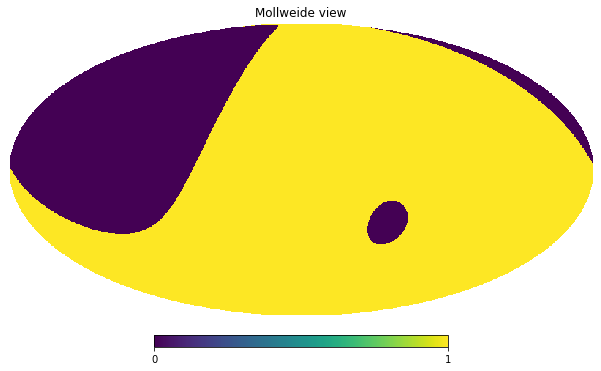

In [7]:
rot_mask = change_coord(mask, ['C', 'G'])
hp.mollview(rot_mask)

In [8]:
total = gal+rot_mask
total[np.where(total==1)] = 0
total[np.where(total==2)] = 1

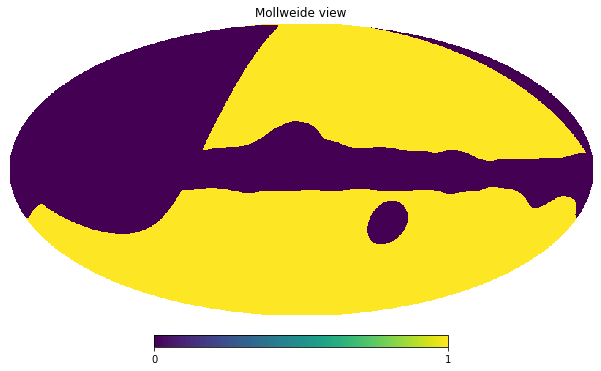

In [9]:
hp.mollview(total)

In [10]:
def my_apo(mask,fsky,name):
    dnside = 512
    methods = {"Smooth":[1.,2.],"C1":[8.,10.]}
    for key in methods.keys():
        for i in methods[key]:
            fname = os.path.join(mpath,f"{name}_Nside{nside}_fsky_{fsky}_Apo_{key}_Deg_{int(i)}.fits.gz")
            if not os.path.isfile(fname):
                print(f"Making {name} mask: method-{key} and scale-{i}")
                if key == "Smooth":
                    msk_apo = nmt.mask_apodization(mask, i, apotype=key)
                elif key == "C1":
                    print(f"Mask will be downsized to Nside={dnside}")
                    msk_apo = nmt.mask_apodization(hp.ud_grade(mask,dnside), i, apotype=key)
                else:
                    raise ValueError
                hp.write_map(fname,msk_apo)
                del msk_apo 
                print(f"file saved to {fname}")
            else:
                print(f"file EXIST {fname}"              

In [11]:
my_apo(total,'0p4','S4')

file EXIST /project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/S4_Nside2048_fsky_0p4_Apo_Smooth_Deg_1.fits.gz
file EXIST /project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/S4_Nside2048_fsky_0p4_Apo_Smooth_Deg_2.fits.gz
file EXIST /project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/S4_Nside2048_fsky_0p4_Apo_C1_Deg_8.fits.gz
file EXIST /project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/S4_Nside2048_fsky_0p4_Apo_C1_Deg_10.fits.gz


In [12]:
my_apo(gal,'0p8','LB')

file EXIST /project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p8_Apo_Smooth_Deg_1.fits.gz
Making LB mask: method-Smooth and scale-2.0


setting the output map dtype to [dtype('float64')]


file saved to /project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p8_Apo_Smooth_Deg_2.fits.gz
Making LB mask: method-C1 and scale-8.0
Mask will be downsized to Nside=512


setting the output map dtype to [dtype('float64')]


file saved to /project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p8_Apo_C1_Deg_8.fits.gz
Making LB mask: method-C1 and scale-10.0
Mask will be downsized to Nside=512


setting the output map dtype to [dtype('float64')]


file saved to /project/projectdirs/litebird/simulations/maps/lensing_project_paper/Masks/LB_Nside2048_fsky_0p8_Apo_C1_Deg_10.fits.gz


In [13]:
#https://arxiv.org/pdf/1907.04473.pdf  figure 4